In [8]:
from causalregnet.models.gamma_fitter import GammaFitter

import numpy as np
import pandas as pd 
import seaborn as sns
import torch

from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl

In [2]:
data = pd.read_csv('../causalregnet/data/k562_100_cancer_genes.csv', header=0, delim_whitespace=True)

In [4]:
data_tensor = torch.tensor(data.iloc[:,0] + 1e-6, dtype=torch.float32)

dataset = TensorDataset(data_tensor)
data_loader = DataLoader(dataset, batch_size=100, shuffle=True)

model = GammaFitter()

trainer = pl.Trainer(max_epochs=10, log_every_n_steps=100, accelerator="mps")
trainer.fit(model, data_loader)

fitted_k = model.k.item()
fitted_theta = model.theta.item()

print(fitted_k)
print(fitted_theta)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type | Params
--------------------------------------
  | other params | n/a  | 2     
--------------------------------------
2         Trainable params
0         Non-trainable params
2         Total params
0.000     Total estimated model params size (MB)
/Users/luka/miniconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


0.12361286580562592
1.0633567571640015


In [31]:
simulated_w = np.random.gamma(shape=fitted_k, scale=fitted_theta, size=1000)
simulated = np.random.poisson(simulated_w*8).tolist()
real_idx = np.random.randint(0, data.shape[0], size=1000)
real = (data.iloc[real_idx, 0] + 1e-6).tolist()

comb_list = simulated+real 

labels = np.repeat('sim', 1000).tolist() + np.repeat('real', 1000).tolist()

df = {'labels': labels, 'data':comb_list}

<Axes: xlabel='data', ylabel='Count'>

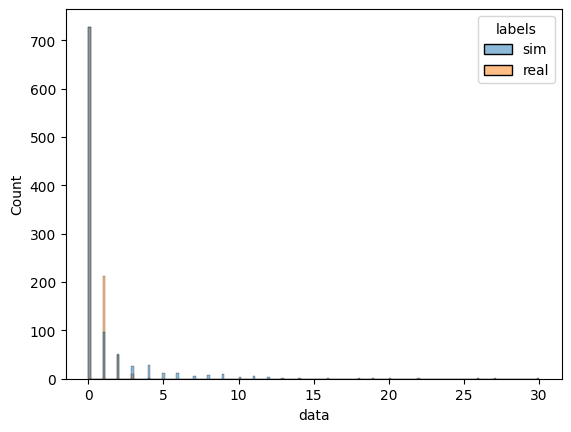

In [32]:
sns.histplot(df, x='data', hue='labels')

In [19]:
np.max(simulated)

3093